# Amplitudenmodulation
## Setup von Parametern

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
from matplotlib import style
style.use('dark_background')


fs=44100 #Hz sampling frequency
f_T=100 #Hz Trägerfrequenz
f_M=10 #Hz Modulatiosnfrequenz
u_T=4 #V Trägeramplitude
u_M=2 #V Modulationsamplitude
m=u_M/u_T # Modulationsindex
t_stop=1. #s Dauer
N=int(t_stop*fs) #Number of samples

In [59]:
time=np.linspace(0,t_stop,N,endpoint=False)
am=u_T*(1+m*np.cos(2*np.pi*f_M*time))*np.cos(2*np.pi*f_T*time)
am_fft=np.fft.rfft(am)/max(np.fft.rfft(am))
ggam=abs(am)
ggam_fft=np.fft.rfft(ggam)/max(np.fft.rfft(ggam))
sos=sig.butter(1, 30, btype='low', analog=False, output='sos', fs=44100)
ggam_filt=sig.sosfilt(sos, ggam)
ggam_fft_filt=np.fft.rfft(ggam_filt)/max(np.fft.rfft(ggam_filt))
freqs=np.fft.rfftfreq(N,1/fs)

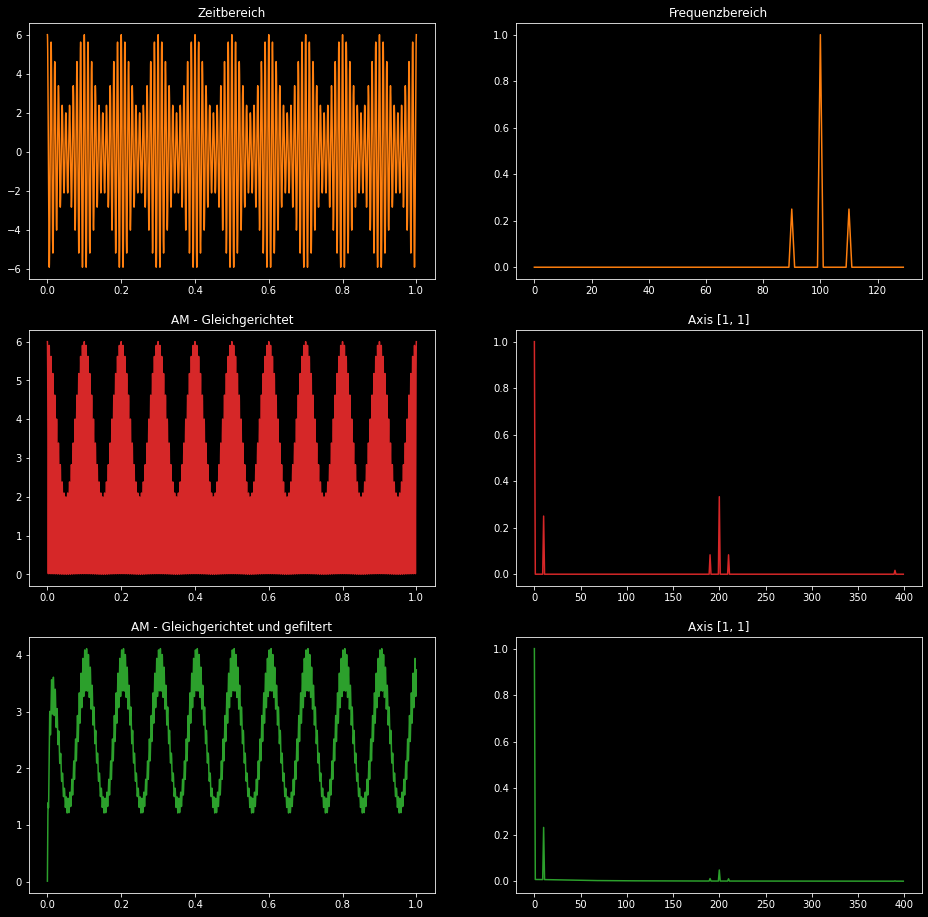

In [60]:
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(time, am, 'tab:orange')
axs[0, 0].set_title('Zeitbereich')
axs[0, 1].plot(freqs[:(f_T+3*f_M)], abs(am_fft)[:(f_T+3*f_M)], 'tab:orange')
axs[0, 1].set_title('Frequenzbereich')
axs[1, 0].plot(time,ggam, 'tab:red')
axs[1, 0].set_title('AM - Gleichgerichtet')
axs[1, 1].plot(freqs[:400], abs(ggam_fft)[:400], 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')
axs[2, 0].plot(time,ggam_filt, 'tab:green')
axs[2, 0].set_title('AM - Gleichgerichtet und gefiltert')
axs[2, 1].plot(freqs[:400], abs(ggam_fft_filt)[:400], 'tab:green')
axs[2, 1].set_title('Axis [1, 1]')
fig.set_figheight(16)
fig.set_figwidth(16)